# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

**Описание данных:**

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра города (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition` — дата публикации

`floor` — этаж

`floors_total` — всего этажей в доме

`is_apartment` — апартаменты (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`last_price` — цена на момент снятия с публикации

`living_area` — жилая площадь в квадратных метрах (м²)

`locality_name` — название населённого пункта

`open_plan` — свободная планировка (булев тип)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`rooms` — число комнат

`studio` — квартира-студия (булев тип)

`total_area` — общая площадь квартиры в квадратных метрах (м²)

`total_images` — число фотографий квартиры в объявлении

#### Обзор данных

Из прочтенного файла видно, что разделителем в датасете является знак табулиции \t.
Выведем первые 10 строк датасета для обзора данных

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Вывод общей информации о полученном датасете

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Вывод описательной статистики для получения общей информации о данных 

In [5]:
#вывод описательной статистики
data.describe() 

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Построение гистограммы для всех числовых столбцов датафрейма для визуального представления данных 

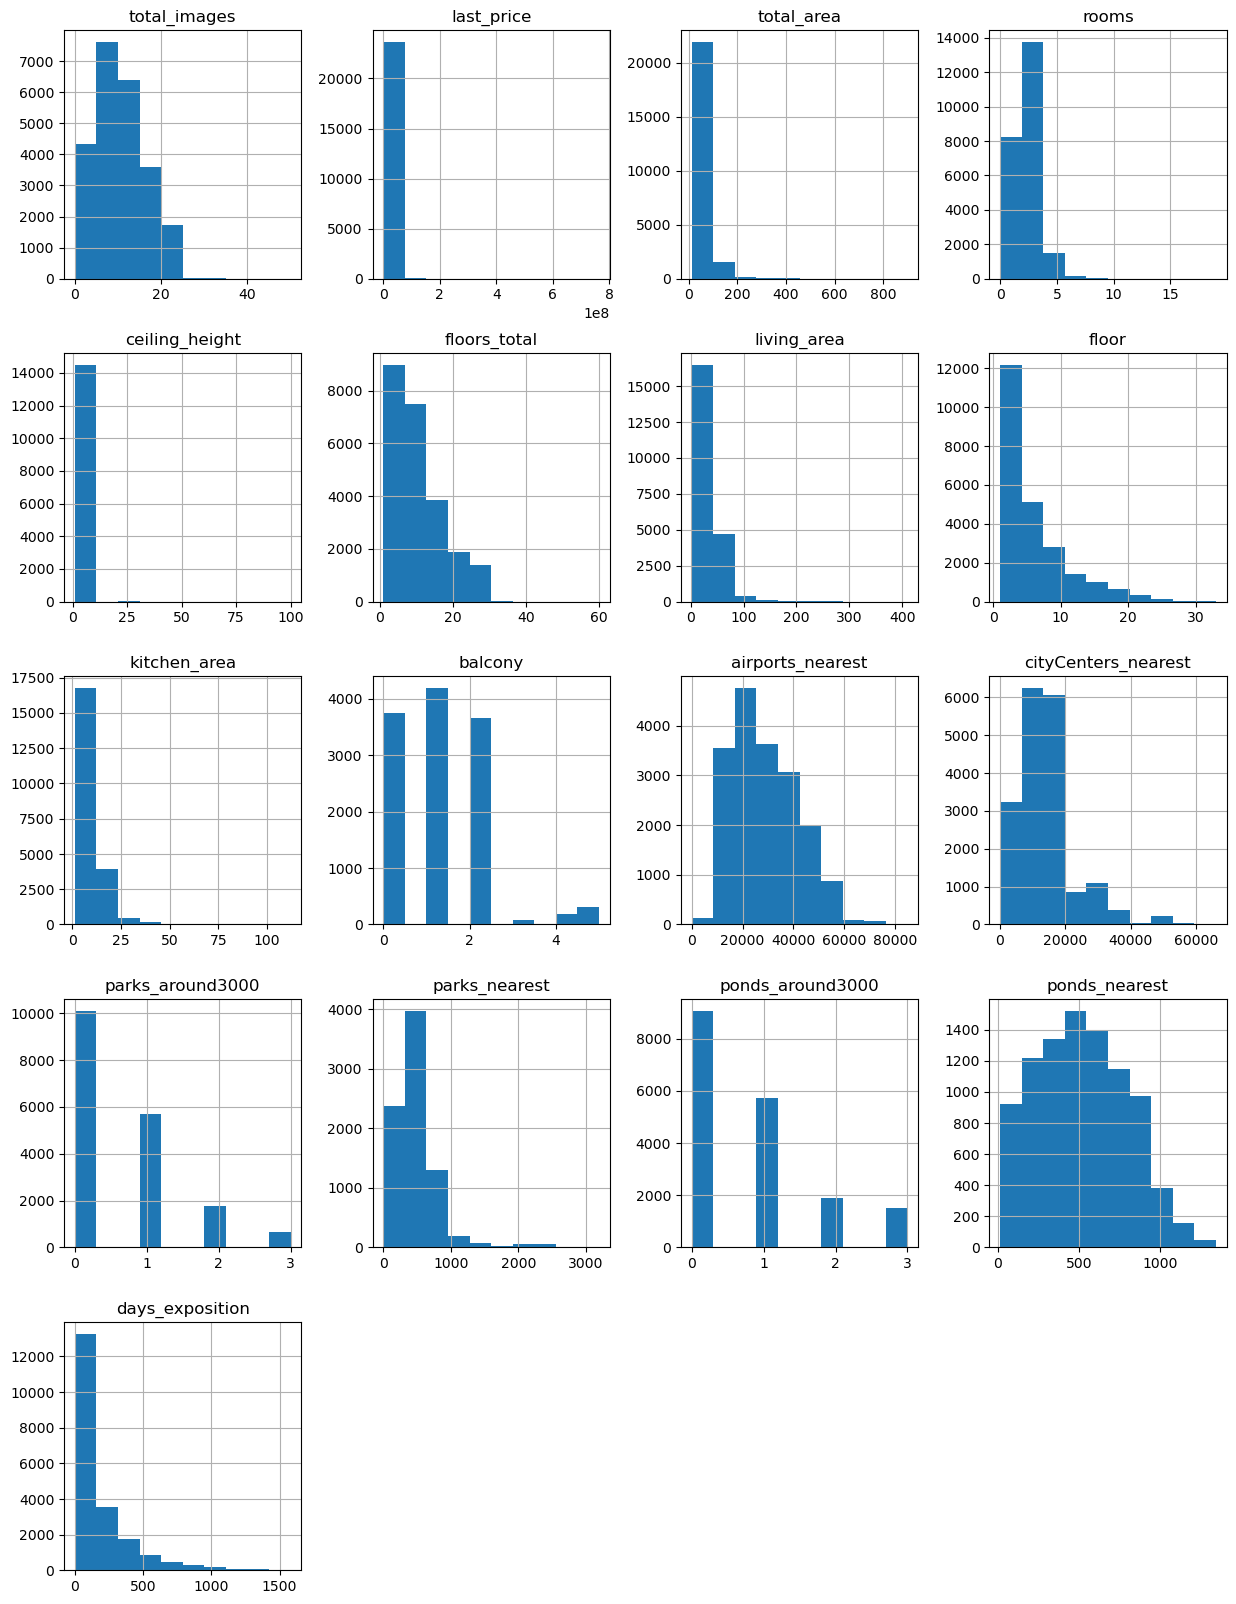

In [6]:
#Построение гистограммы
data.hist(figsize=(15,20))
plt.show()

#### Вывод: 

Входе исследования датафрейма выяснилось:

1. Датафрейм состоит из 23699 строк.
2. В датафрейме 22 колонки:
        airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
        balcony — число балконов
        ceiling_height — высота потолков (м)
        cityCenters_nearest — расстояние до центра города (м)
        days_exposition — сколько дней было размещено объявление (от публикации до снятия)
        first_day_exposition — дата публикации
        floor — этаж
        floors_total — всего этажей в доме
        is_apartment — апартаменты (булев тип)
        kitchen_area — площадь кухни в квадратных метрах (м²)
        last_price — цена на момент снятия с публикации
        living_area — жилая площадь в квадратных метрах (м²)
        locality_name — название населённого пункта
        open_plan — свободная планировка (булев тип)
        parks_around3000 — число парков в радиусе 3 км
        parks_nearest — расстояние до ближайшего парка (м)
        ponds_around3000 — число водоёмов в радиусе 3 км
        ponds_nearest — расстояние до ближайшего водоёма (м)
        rooms — число комнат
        studio — квартира-студия (булев тип)
        total_area — площадь квартиры в квадратных метрах (м²)
        total_images — число фотографий квартиры в объявлении
3. Так же в данных имеются пропущенные значения.
4. Некоторые типы данных необходимо конвертировать.
5. Колонки датафрейма имеют правильное наименование за исключением колонки cityCenters_nearest, которая написана в верблюжьем регистре
6. В данных имеются аномальные максимальные значения, которые необходимо проверить.

### Предобработка данных

#### Редактирование названия колонки

In [7]:
#редактирование колонки замена стиля CamelCase на snake_case
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'}) 

#Проверка результата
data.columns 

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Проверка из замена значений NAN

In [8]:
#узнаем количество пропущенных значений для каждого столбца
data.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
#определение процентного соотношения числа пропущенных значений по стобцам 
procent=data.isna().mean()*100 
procent

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

In [10]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


<Axes: title={'center': 'Соотношение пропущенных значений'}>

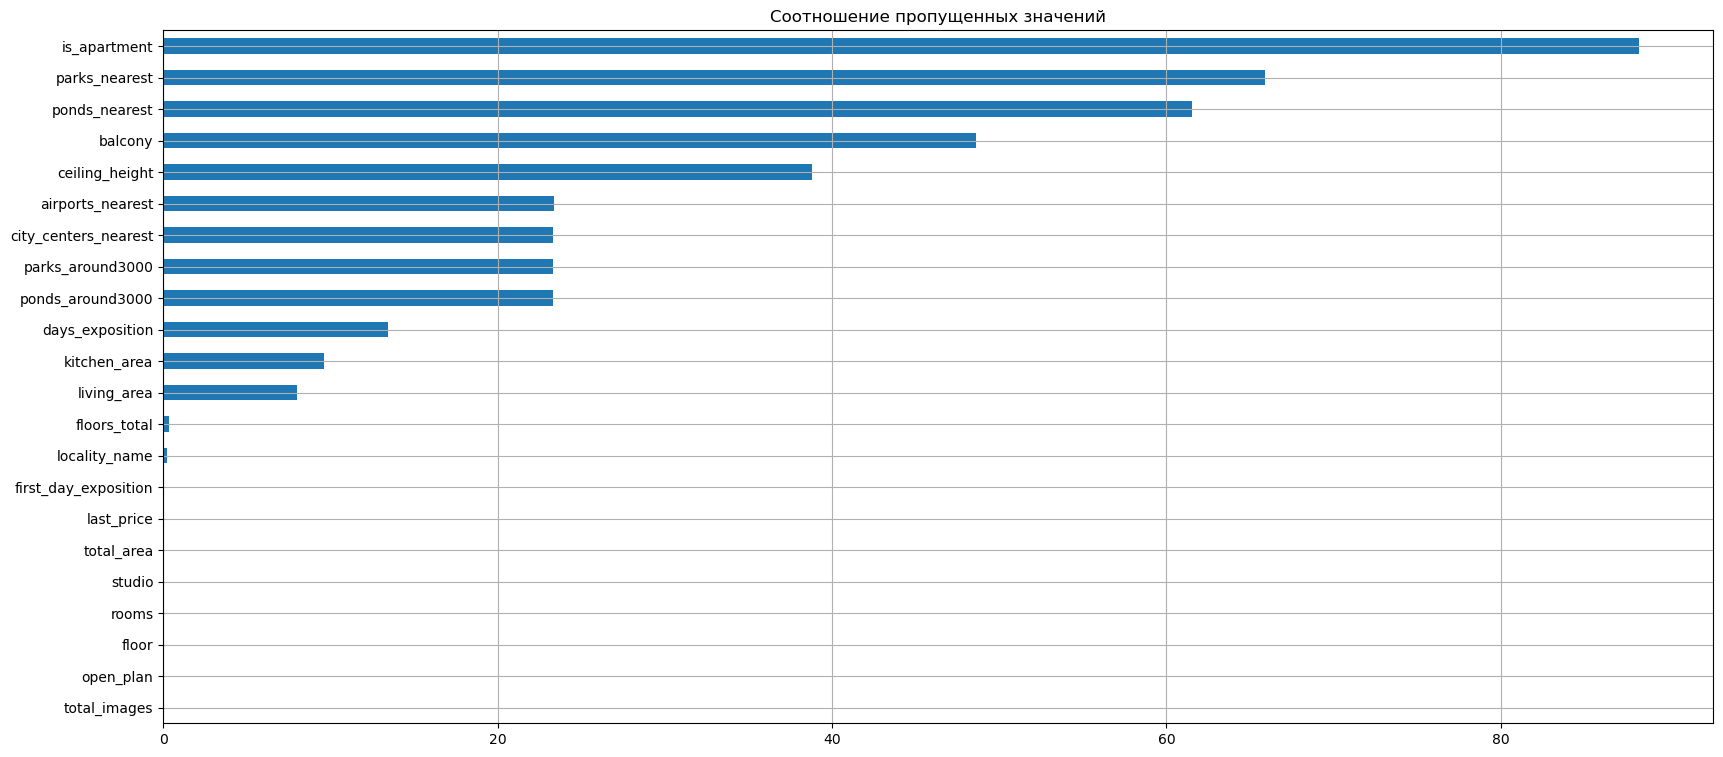

In [11]:
procent.sort_values(ascending=True).plot(kind='barh', title="Соотношение пропущенных значений", figsize=(20,9),grid=True)


На графике видно, что колонки: is_apartment, peaks_nearest, ponds_nearest, balcony, ceiling_height имеют самый большой процент пропусков. Это может сильно исказить результаты исследования.

#### Заменим значения NaN по каждой колонке, применяя к каждой колонке свой подход

Создадим словарь с ключами - название нужной колонки и передадим необходимые значения

balcony: Nan - заменяем на значение 0, в связи с отсутствием в квартире балкона
ponds_around3000 и parks_around3000 : Nan - заменяем на значение 0, т.к. прудов и парков поблизости нет 
is_apartment : Nan заменим на False(не аппартаменты), и тем самым приравняем всю выборку к типу "квартира".
ceiling_height: все Nan заименим медианной величиной  

In [12]:
# Создание словаря для передачи в функцию fillna()
value = {
    'balcony': 0,
    'ponds_around3000': 0,
    'parks_around3000': 0,
    'is_apartment': False,
    'ceiling_height': data['ceiling_height'].median(),
}

# Замена NAN значений в соответствии с созданным словарем
data = data.fillna(value=value) 

# Повторная проверка результата
data.isna().mean()*100  

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height           0.000000
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment             0.000000
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                  0.000000
locality_name            0.206760
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around3000         0.000000
parks_nearest           65.909954
ponds_around3000         0.000000
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Необходимые замены NaN произведены, следующим этапом необходимо удалить лишние значения.

#### Удаление значений NaN

Проведем удаление значений NAN в колонках floors_total, locality_name т.к. количество этих значений в выборке мало.

In [13]:
#метод.dropna() удаляет те сроки , в которых встречается хотя бы один пропуск
data = data.dropna(subset=['floors_total', 'locality_name'])  

# Повторная проверка результата
data.isna().mean()*100 

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height           0.000000
floors_total             0.000000
living_area              7.914280
floor                    0.000000
is_apartment             0.000000
studio                   0.000000
open_plan                0.000000
kitchen_area             9.429238
balcony                  0.000000
locality_name            0.000000
airports_nearest        23.441545
city_centers_nearest    23.343942
parks_around3000         0.000000
parks_nearest           65.924040
ponds_around3000         0.000000
ponds_nearest           61.654997
days_exposition         13.456397
dtype: float64

Необходимые строки удалены 

в колонках airports_nearest, parks_nearest, ponds_nearest и city_centers_nearest невозможно заменить пропуски на числовое значение (так замена на 0 , будет означать что квартира расположена в аэропорту, парке или пруду), удалить также не представляется возможным, т.к. будет утерян большой объем данных.
Пропуски в колонках : 'living_area', 'kitchen_area', 'days_exposition', также невозможно заменить на 0 в связи с утратой логики, или удалить, в связи с потерей большого объема данных.

#### Проверка и удаление дубликатов

проверим датафрейм на наличие явных дубликатов

In [14]:
# Проверка датасета на наличие явных дубликатов
data.duplicated().sum()

0

Явные дубликаты отсутствуют

Проверим колонку locality_name на наличие неявных дубликатов

In [15]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Из выведенных данных видно, что значениях колонки locality_name присутствуют одноименные населенные пункты, часть которых написана через букву ё, а другая часть через букву е.

In [16]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')  # Замена буквы ё на е

In [17]:
data['locality_name'].sort_values().unique() # повторно выведем результат

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Лесогорский',
       'городской поселок Мга', 'городской поселок Назия',
       'городской поселок Новоселье', 'городской поселок Павлово',
       'городской поселок Рощино', 'городской поселок Свирьстрой',
       'городской поселок Советский', 'городской поселок Фед

Замена ё на е проведена успешно

#### Изменение типов данных

In [18]:
# ещё раз помострим на общие данные датасета 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Из данных видно, что значения столбцов: floors_total, balcony, parks_around3000 , ponds_around3000 являются целочисленными и тип данных должен быть изменен на int.
колонка first_day_exposition  - несет в себе даты, необходимо изменить тип данных на datetime. для упрощения дальнейшей работы с колонкой.

In [19]:
# Приведение типов к удобному формату:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int64')
data['balcony'] = data['balcony'].astype('int64')
data['parks_around3000'] = data['parks_around3000'].astype('int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')
#data['last_price'] = data['last_price'].astype('int64')

# Вывод полученных результатов:
print('Формат данных колонки first_day_exposition: {}'.format(data['first_day_exposition'].dtypes))
print('Формат данных колонки floors_total: {}'.format(data['floors_total'].dtypes))
print('Формат данных колонки balcony: {}'.format(data['balcony'].dtypes))
print('Формат данных колонки parks_around3000: {}'.format(data['parks_around3000'].dtypes))
print('Формат данных колонки ponds_around3000: {}'.format(data['ponds_around3000'].dtypes))
#print('Формат данных колонки last_price: {}'.format(data['last_price'].dtypes))

Формат данных колонки first_day_exposition: datetime64[ns]
Формат данных колонки floors_total: int64
Формат данных колонки balcony: int64
Формат данных колонки parks_around3000: int64
Формат данных колонки ponds_around3000: int64


тип данных изменен, посмотрим на результат

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

Типы данных приведены в соответствие

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавление дополнительных колонок (Цена одного кв. метра и разбивка даты на день\месяц\год)

In [21]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [22]:
# Дробление даты на день, месяц, год
data['day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

data['area_price'] = (data['last_price'] / data['total_area']).astype('int64')  # Расчет цены за квадратный метр

Проверим полученный результат: 

In [23]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'day', 'month', 'year',
       'area_price'],
      dtype='object')

In [24]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day,month,year,area_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,482.0,2,755.0,NaN,3,3,2019,120370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0,NaN,0,NaN,81.0,1,12,2018,82920
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1,90.0,2,574.0,558.0,3,8,2015,92785
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,6800.0,2,84.0,3,234.0,424.0,4,7,2015,408176
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,112.0,1,48.0,121.0,1,6,2018,100000


#### Категоризация недвижимости по этажу

Создадим дополнительную колонку с указание типа этажа недвижимости, исходя из логики:
   1. объект недвижимости расположенный на первом этаже - категория "первый"
   2. объект недвижимости расположенный на последнем этаже - категория "последний"
   3. объект недвижимости расположенный на других этажах - категория "другой"

In [25]:
# Фукнция категоризации этажности объектов недвижимости
try:
    def floor_group(i):
        if i['floor'] == 1:
            return 'первый'
        elif i['floor'] == i['floors_total']:
            return 'последний'
        return 'другой'
    
    data['floor_type'] = data.apply(floor_group, axis=1)  # Применение функции floor_group к выборке по столбцу floor_type
except:
    print('Произошла ошибка')    

In [26]:
#Проверка резульатов:
data.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day,month,year,area_price,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482.0,2,755.0,NaN,3,3,2019,120370,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,NaN,0,NaN,81.0,1,12,2018,82920,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1,90.0,2,574.0,558.0,3,8,2015,92785,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,2,84.0,3,234.0,424.0,4,7,2015,408176,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1,48.0,121.0,1,6,2018,100000,другой


#### Расстояние до центра города

Для удобства исследования изменим единицу измерения в колонке "city_centers_nearest" на километры и округлим до ближайших целых значений. 

In [27]:
data['city_centers_nearest'] # Посмотрим текущие значения

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695        NaN
23696        NaN
23697    10364.0
23698        NaN
Name: city_centers_nearest, Length: 23565, dtype: float64

In [28]:
data['city_centers_nearest'] = round(data['city_centers_nearest']) #применим метод round() для округления 
data['city_centers_nearest']

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695        NaN
23696        NaN
23697    10364.0
23698        NaN
Name: city_centers_nearest, Length: 23565, dtype: float64

In [29]:
data['city_centers_nearest']

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695        NaN
23696        NaN
23697    10364.0
23698        NaN
Name: city_centers_nearest, Length: 23565, dtype: float64

Дополнительно добавим новой столбец данных с указанием класса этажа ('первый' - 1 ,'последний' - 2, 'другой' - 3 ) для удобства расчета кореляционной зависимости

In [30]:
def floor_class(row):
    if row['floor_type'] == 'другой':
        return 3
    elif row['floor_type'] == 'первый':
        return 1
    elif row['floor_type'] == 'последний':
        return 2
    else:
        pass

In [31]:
data['floor_class'] = data.apply(floor_class, axis = 1)

In [32]:
data['floor_class'].head() #проверка

0    3
1    1
2    3
3    3
4    3
Name: floor_class, dtype: int64

### Исследовательский анализ данных

#### Исследование общей площади квартир

In [33]:
# вывод описательной статистики по колонке ['total_area']
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

из данных видно:
    1. минимальная площадь квартиры 12 метров.
    2. максимальная площадь квартиры 900 метров.
    3. медианная площадь квартиры 35.6 метра.

Построим гистограмму распределения площадей квартир для визуализации.

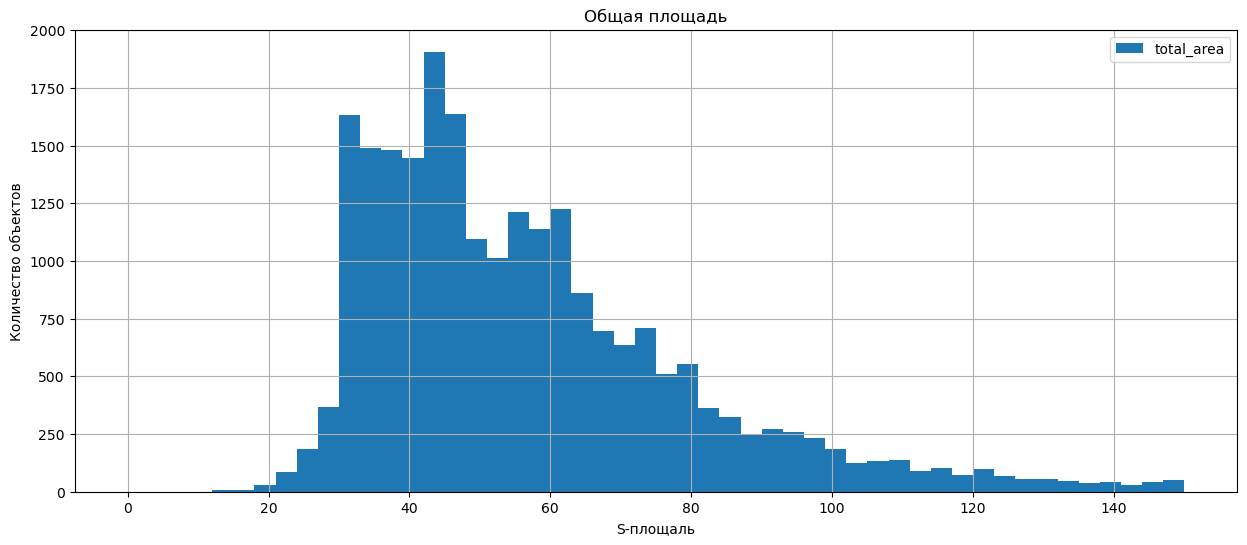

In [34]:
fig, ax = plt.subplots()
data.plot(kind='hist', y='total_area', bins=50, range=(0, 150),
          title='Общая площадь', figsize=(15, 6), grid=True, ax=ax)

# Добавляем подписи к осям:
ax.set_xlabel('S-площаль')
ax.set_ylabel('Количество объектов');

Из гистограммы видно, что статистические данные соответствуют нормальному распределению находящиеся в диапазоне 40-70 квадратных метров. Квартир более 250 квадратных метров не наблюдается, за исключением аномального значения в 900 квадратных метров. 

#### Исследование жилой площади квартир

Выведем статистические данные по колонке living_area.

In [35]:
# Вывод описательной статистики по столбцу living_area
data['living_area'].describe()

count    21700.000000
mean        34.454822
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Из данных видно:
        1. минимальная жилая площадь квартиры - 2 квадратных метра (аномальное значение скорее всего)
        2. максимальная жилая площадь квартиры 409 квадратных метров
        3. диапазон нормальных значений от 19 метров до 42 квадратных метров 

Построим гистограмму жилой площади, для визуализации 

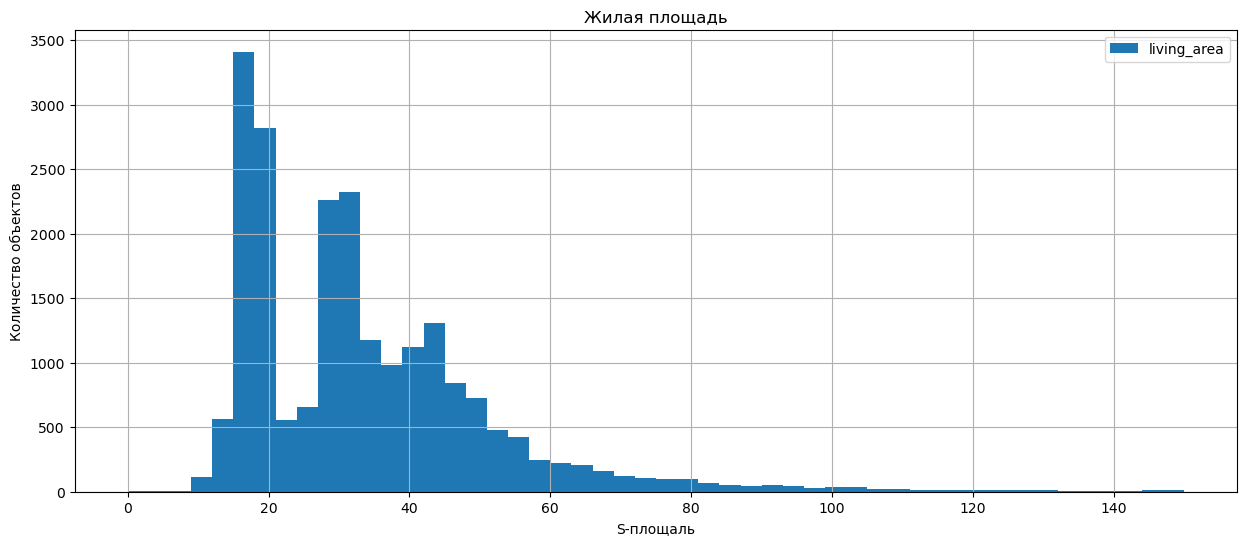

In [36]:
fig, ax = plt.subplots()
data.plot(kind='hist', y='living_area', bins=50, range=(0, 150),
          title='Жилая площадь', figsize=(15, 6), grid=True, ax=ax)

# Добавляем подписи к осям:
ax.set_xlabel('S-площаль')
ax.set_ylabel('Количество объектов');


больше всего квартир в выборке с жилой площадью около 18 метров. видимо самая популярная планировка квартир это однушки или студии. Другой популярный тип квартир имеет 30-35 кв. метров жилую площадь.

#### Исследование площадь кухни;

In [37]:
data['kitchen_area'].describe() # Вывод описательной статистики по столбцу kitchen_area

count    21343.000000
mean        10.560994
std          5.900630
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Из выведенных данных мы можем сделать следующие выводы:

минимальная площадь кухонь составляет 1 квадратный метр;
максимальная плащадь кухонь составляет 112 квадратных метра;
нормальное распределение находится в диапазоне от 7 до 12 квадратных метров.

Построим гистограмму распределения площадей кухонь для визуализации.

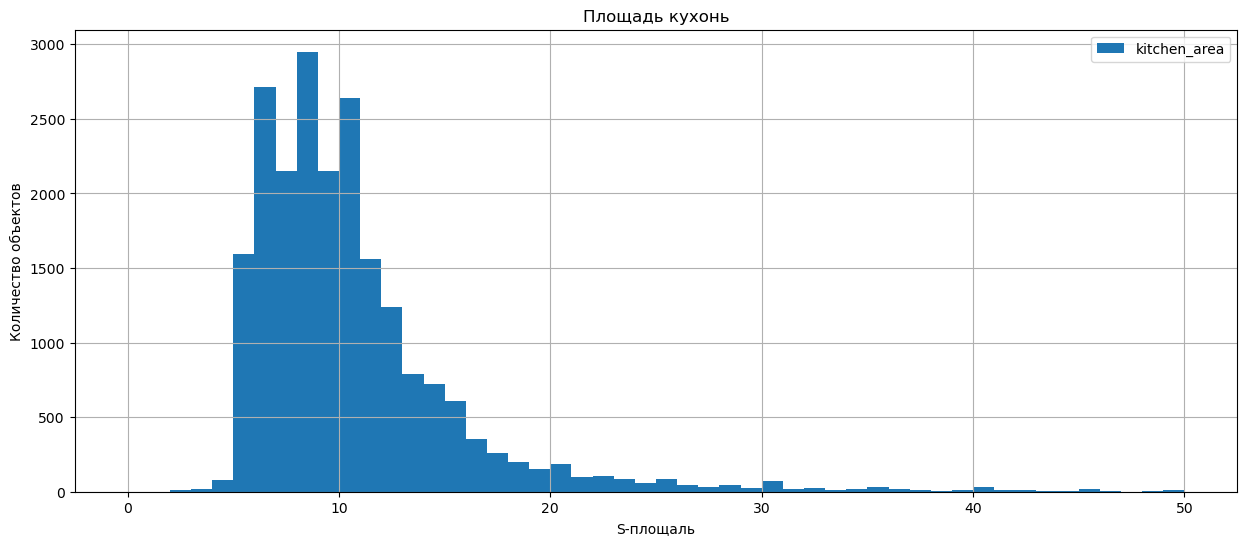

In [38]:
fig, ax = plt.subplots()
data.plot(kind='hist', y='kitchen_area', bins=50, range=(0, 50),
          title='Площадь кухонь', figsize=(15, 6), grid=True, ax=ax)

# Добавляем подписи к осям:
ax.set_xlabel('S-площаль')
ax.set_ylabel('Количество объектов');

Из гистограммы видно, что статистические данные подтверждаются кухни большинства квартир находится в диапазоне от 7 до 12 квадратных метров. Однако находятся и квартиры с большими кухнями. Квартира с кухней 112 квадратных метров является аномальным значением.

#### Исследование цены объекта;

In [39]:
# Вывод описательной статистики по столбцу last_price
round(data['last_price'].describe()) 

count        23565.0
mean       6540058.0
std       10910935.0
min          12190.0
25%        3400000.0
50%        4646000.0
75%        6790000.0
max      763000000.0
Name: last_price, dtype: float64

Из выведенных данных мы можем сделать следующие выводы:

минимальная стоимость квартир составляет 12 190 руб. - это аномальное значение
максимальная стоимость квартир составляет 763 000 000 руб.
нормальное распределение стоимости квартир находится в диапазоне от 3 400 000 руб. до 6 790 000 руб.

Построим гистограмму распределения стоимости квартир для визуализации.

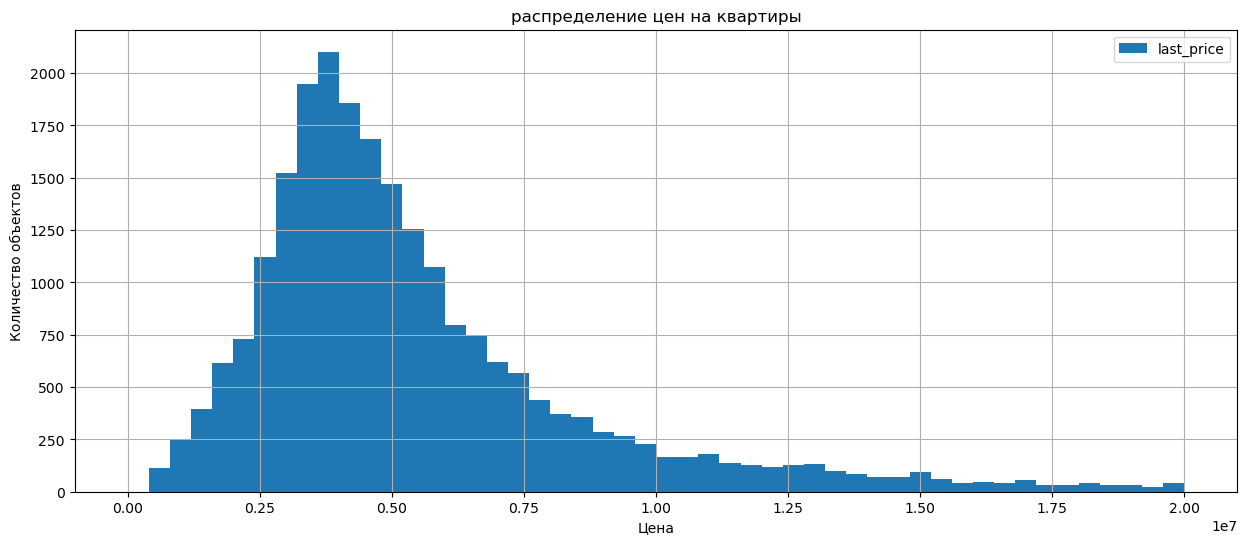

In [40]:
fig, ax = plt.subplots()
data.plot(kind='hist', y='last_price', bins=50, range=(0, 20000000),
          title='распределение цен на квартиры', figsize=(15, 6), grid=True, ax=ax)

# Добавляем подписи к осям:
ax.set_xlabel('Цена')
ax.set_ylabel('Количество объектов');

Из гистограммы видно, что большая выборка квартир находится в диапазоне от 3 000 000 руб. до 7 000 000 руб. Квартир больше 20 000 000 руб. не наблюдается. Квартиры больше этой стоимости имеют аномально высокие цены.

#### Исследование количества комнат

In [41]:
# Вывод описательной статистики по столбцу rooms
data['rooms'].describe() 

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Из полученных данных видно:
* минимальное количество комнат в квартире 0
* максимальное количество комнат в квартире 19
* нормальное распределение количества квартир от 1 до 3 - правдивая информация 

Построим гистограмму распределенияпо числу комнат в квартирах для визуализации

Text(0, 0.5, 'Количество объектов')

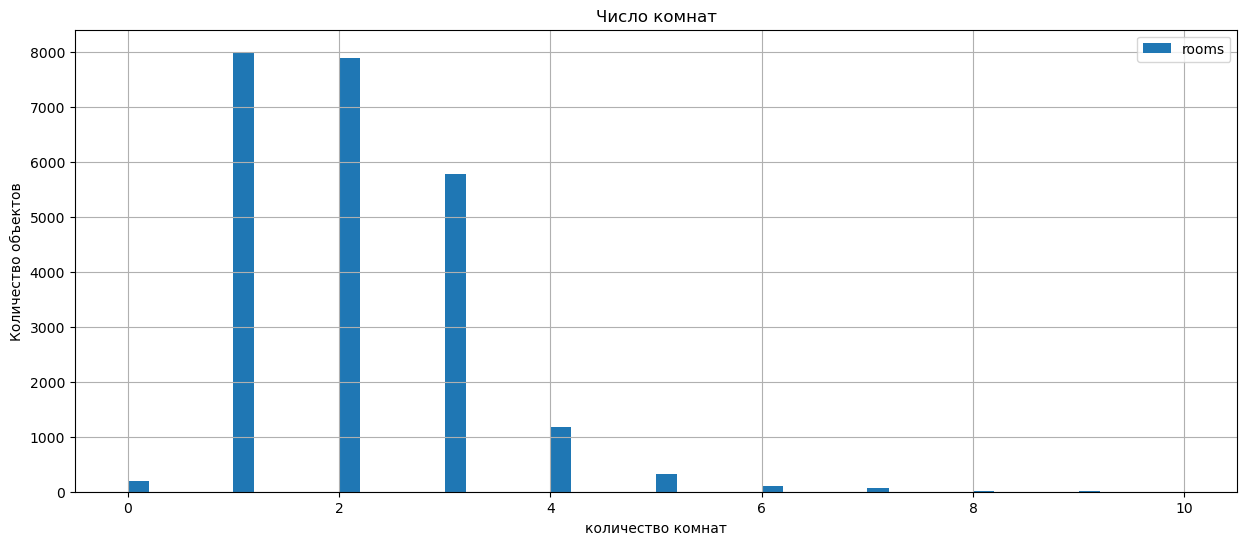

In [42]:
fig, ax = plt.subplots()
data.plot(kind='hist', y='rooms', bins=50, range=(0, 10),
          title='Число комнат', figsize=(15, 6), grid=True, ax=ax)

# Добавляем подписи к осям:
ax.set_xlabel('количество комнат')
ax.set_ylabel('Количество объектов')

Из гистограммы видно, большинство квартир имеют 1, 2 или 3 комнаты. Квартир где 4, 5, 6 комнат значительно меньше. 


#### Исследование высота потолков

In [43]:
# Вывод описательной статистики по столбцу ceiling_height
data['ceiling_height'].describe() 

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Из полученных данных видно:
* минимальная высота потолков - 1 метр 
* максимальная высота потолков - 100 метров (аномальное значение)
* нормально распределение уровня высоты потолков 2.6 - 2.7 метра

построим гистограмму распределения по высоте потолков

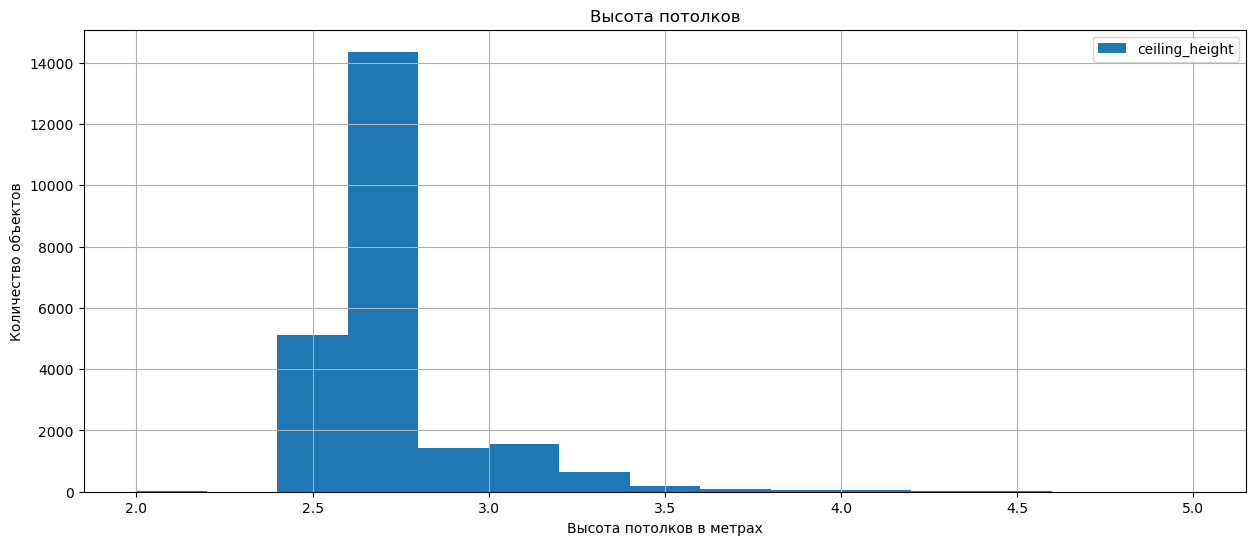

In [44]:
fig, ax = plt.subplots()
data.plot(kind='hist', y='ceiling_height', bins=15, range=(2, 5),
          title='Высота потолков', figsize=(15, 6), grid=True, ax=ax)

# Добавляем подписи к осям:
ax.set_xlabel('Высота потолков в метрах')
ax.set_ylabel('Количество объектов');

Из гистограммы видно, что большая часть квартир имеет высоту потолков 2.6 - 2.7 метра, так же встречаются квартиры с высотой потолков более 3х метров, но реже.
максимальная высота 100 потолка метров - определенно является аномалией в данных.


#### Исследование тип этажа квартиры («первый», «последний», «другой»);

In [45]:
# Вывод описательной статистики по столбцу floor_type
data['floor_type'].describe()

count      23565
unique         3
top       другой
freq       17326
Name: floor_type, dtype: object

In [46]:
# Выведем стасистику по столбцу floor_type
data['floor_type'].value_counts()

другой       17326
последний     3330
первый        2909
Name: floor_type, dtype: int64

Выведем гистограмму распределения по типу этажей

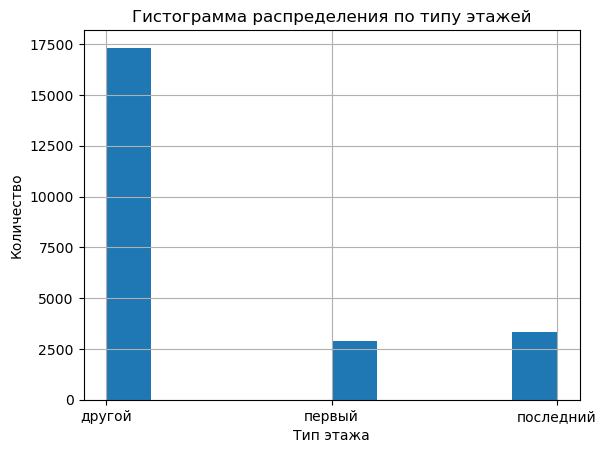

In [47]:
data['floor_type'].hist()
plt.title('Гистограмма распределения по типу этажей')
plt.xlabel('Тип этажа')
plt.ylabel('Количество');

Из данных видно, что большая часть недвижимости находится между первыми и последними этажами

#### Исследование общее количество этажей в доме;

In [48]:
# Вывод описательной статистики по столбцу floors_total
data['floors_total'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Из данных видно, что :
    * минимальное количество этажей в доме: 1
    * максимальное количество этажей: 60
    * нормальное распределение данных от 5 до 16 этажей

Построим гистограмму распределения по количеству этажей в доме

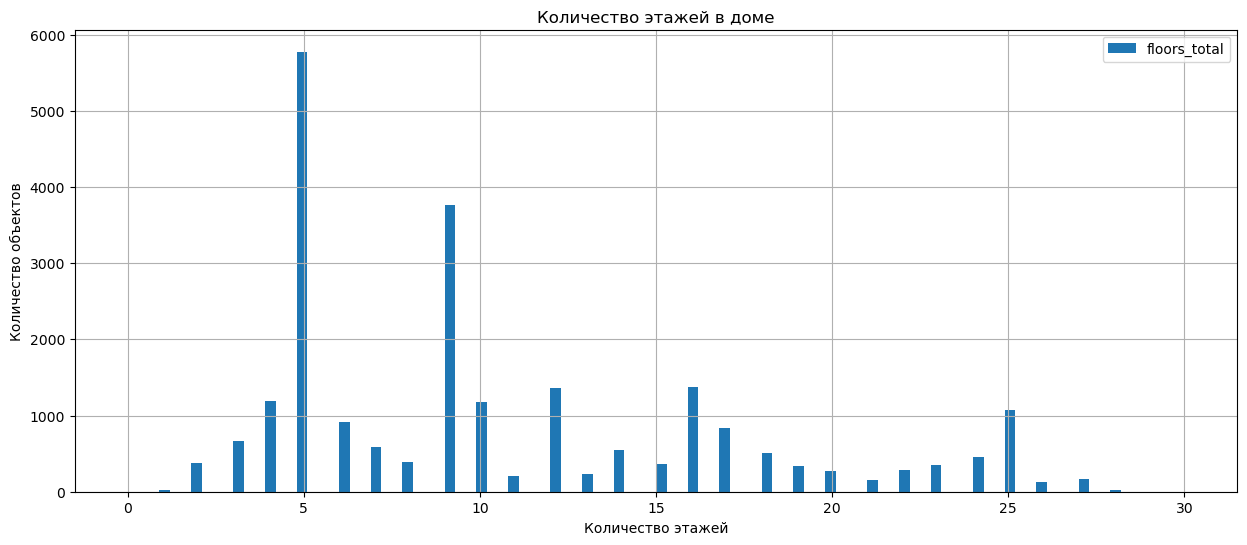

In [49]:
fig, ax = plt.subplots()
data.plot(kind='hist', y='floors_total', bins=100, range=(0, 30),
          title='Количество этажей в доме', figsize=(15, 6), grid=True, ax=ax)

# Добавляем подписи к осям:
ax.set_xlabel('Количество этажей')
ax.set_ylabel('Количество объектов');

Большая часть квартир расположена в 5 этажных домах , другая меньшая часть квартир расположена в 9 этажных домах, в 16 этажах чуть меньше.
Данные соответствуют нормальньному распределению. В городе Санкт-Петербург преимущественно продают квартиры в  5 и 9 этажной застройке.
Из данных заметно что преимущественная застройка в Санкт-Петербурге 5,9,16,25 этажные дома.

#### Исследование расстояние до центра города в метрах;

In [50]:
# Вывод описательной статистики по столбцу city_centers_nearest
data['city_centers_nearest'].describe()

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

из выведенной статистики видно, что :
1. минимальное расстояние до центра города 181 метр
2. максимальное расстояние до центра города 65968 метров
3. нормальное распределение находится в диапазоне от 9238 - 16285 метров

Построим гистограмму распределения объектов по расстоянию до центра города

Text(0, 0.5, 'Количество объектов')

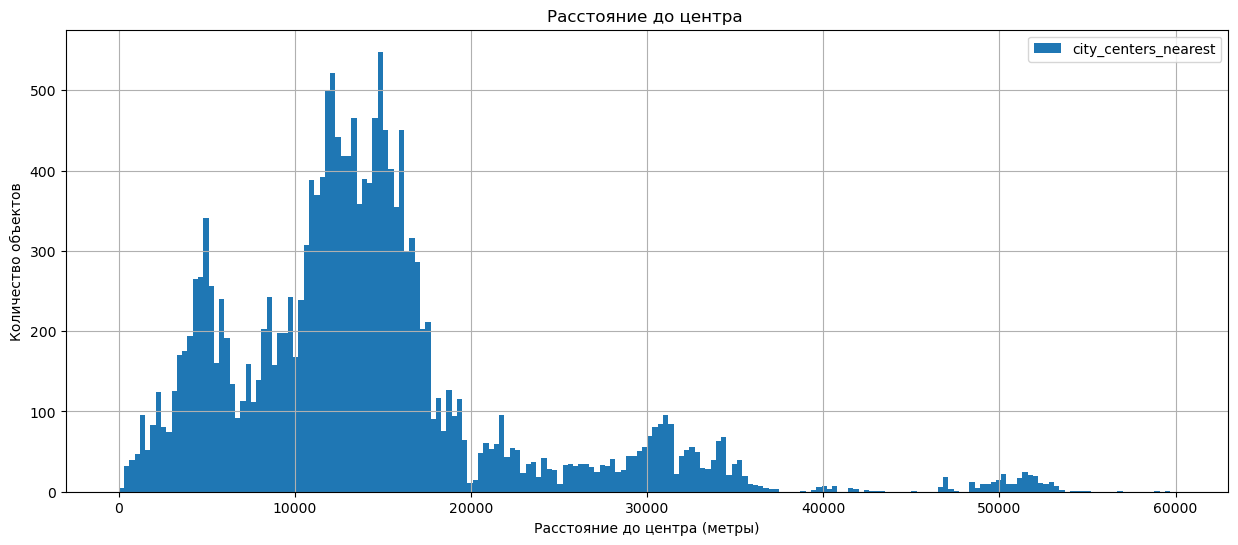

In [51]:
fig, ax = plt.subplots()
data.plot(kind='hist', y='city_centers_nearest', bins=200, range=(0, 60000),
          title='Расстояние до центра ', figsize=(15, 6), grid=True, ax=ax)

# Добавляем подписи к осям:
ax.set_xlabel('Расстояние до центра (метры)')
ax.set_ylabel('Количество объектов')

Из гистограммы видно, что большая часть квартир находится на расстоянии 13000 - 16000 тысяч метров от центра. 
Так же есть квартиры на расстоянии от 4000-8000 метров от центра. Значительно меньшее количество квартир находится на расстоянии от 20000 метров.


#### Исследование расстояние до ближайшего парка

In [52]:
# Вывод описательной статистики по столбцу parks_nearest
data['parks_nearest'].describe()

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

В датафрейме присутствует только 8030 строк с данными, это связано с тем, что у других квартир поболизости парков - нет.
исходя из данных, можно сказать:
    * минимальное расстояние до ближайшего парка - 1 метр (является аномальным значением, конечно если это не будка охранника парка)
    *максимакльное расстояние до ближайшего парка  - 3190 метров
    *нормальное распрделение соответствует от 288 до 612 метров

построим гистограмму распределения расстояния до ближайшего парка

Text(0, 0.5, 'Количество объектов')

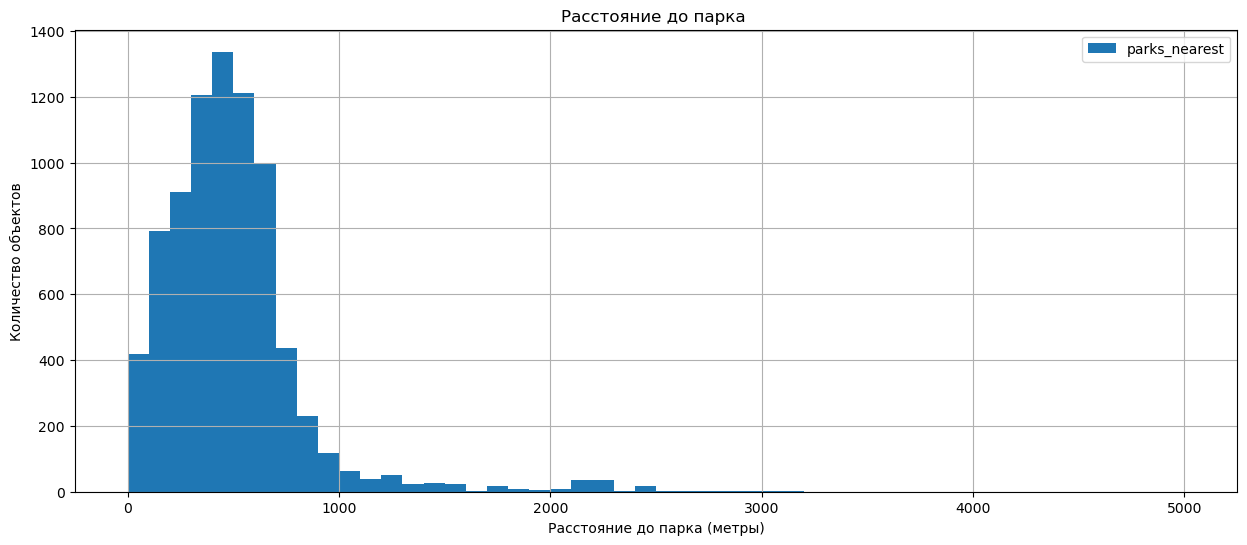

In [53]:
fig, ax = plt.subplots()
data.plot(kind='hist', y='parks_nearest', bins=50, range=(0, 5000),
          title='Расстояние до парка ', figsize=(15, 6), grid=True, ax=ax)

# Добавляем подписи к осям:
ax.set_xlabel('Расстояние до парка (метры)')
ax.set_ylabel('Количество объектов')

из гистограммы распредления видно, что большинство квартир расположено в 280 до 612 метрам, что соответствует нормальному распределению значений

#### Исследование расстояние до ближайшего аэропорта

In [54]:
# Вывод описательной статистики по столбцу airports_nearest
data['airports_nearest'].describe() 

count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

1. минимальное расстояние до аэропорта составляет 0 метров, очевидно это аномальное значение.
2. максимальное расстояние 84869 метров.
3. нормальное распределение недвижимости в диапазоне от 18565 до 37273 метров от аэропорта

Посмотрим на гистограмму распределения по расстоянию до ближайшего аэропорта

Text(0, 0.5, 'Количество объектов')

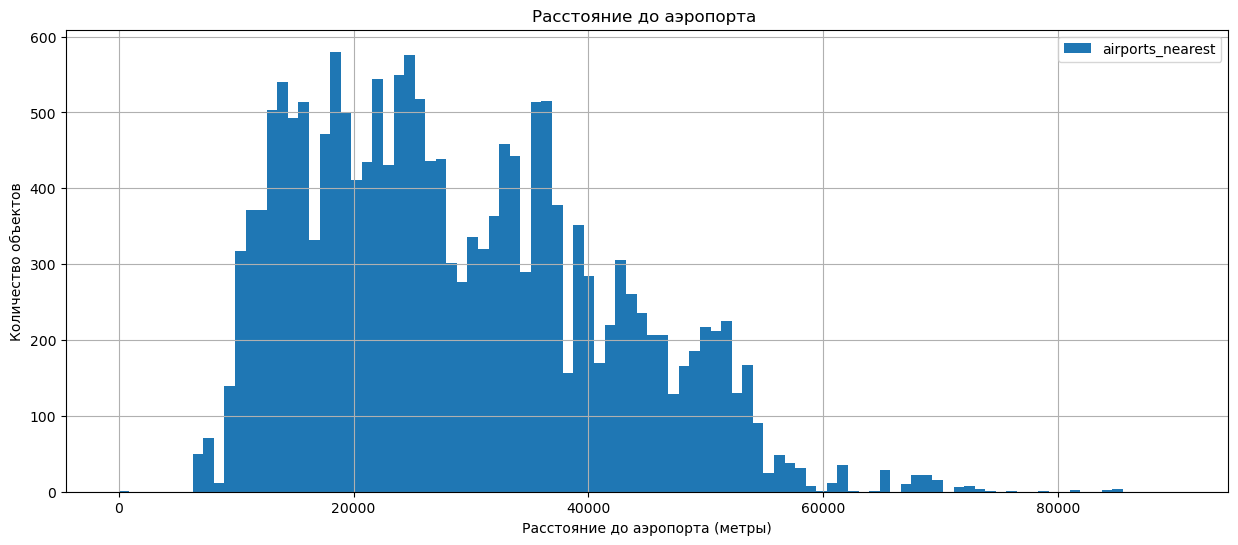

In [55]:
fig, ax = plt.subplots()
data.plot(kind='hist', y='airports_nearest', bins=100, range=(0, 90000),
          title='Расстояние до аэропорта ', figsize=(15, 6), grid=True, ax=ax)

# Добавляем подписи к осям:
ax.set_xlabel('Расстояние до аэропорта (метры)')
ax.set_ylabel('Количество объектов')

Большая часть квартир расположена на расстоянии нормальных значений в диапазоне от 18500 до 37000 метров от аэропорта.
На гистограмме заметны высокие значения в областях 16000, 19000, 250000,37000 метров. Скорее всего это связано с особенностью расположения крупных районов в исследуемой области.

#### Анализ времени продажи квартир 

В целях более подробного изучения объявлений о продаже квартир, проведем анализ времени продажи квартир.

In [56]:
# Вывод описательной статистики по столбцу days_exposition
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Из выведенных данных мы можем сделать следующие выводы:
    
 * минимальное количество дней продажи квартиры составляет 1 день.  Скорее всего это был очень интересный и выгодный вариант, либо это просто совпадение.
 * максимальное количество дней продажиж квартиры составляет 1580 дней. Эта квартира была в продаже почти 5 лет. Наверное собственник квартиры не уступал в цене либо квартира в плохом состоянии или находится в неблагополучном районе. 
 * нормальное расспределение количества дней продажи квартир составляет от 45 до 231 дня. 
 * среднее время продажи квартир для всех объявлений состаляет 180 дней.
 * медианное время продажи квартир для всех объявлений составляет 95 дней. 
 
  Разница в среднем и медианном значиии обусловлена с тем, что в датафрейме присутствуют квартиры, которые продавались необычно долго.
 

Построим гистограмму распределения скорости реализации квартир для визуализации.

<Axes: title={'center': 'Время продажи квартир'}, ylabel='Frequency'>

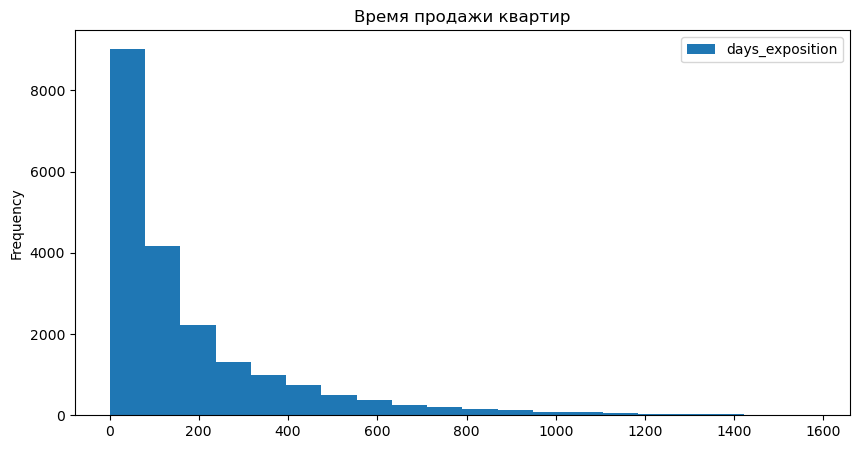

In [57]:
# Построение гистограммы распределения времени продажи по объектам недвижимости
data.plot(kind='hist', y='days_exposition', bins=20, title='Время продажи квартир', figsize=(10, 5))

<Axes: title={'center': 'Время продажи квартир'}, ylabel='Frequency'>

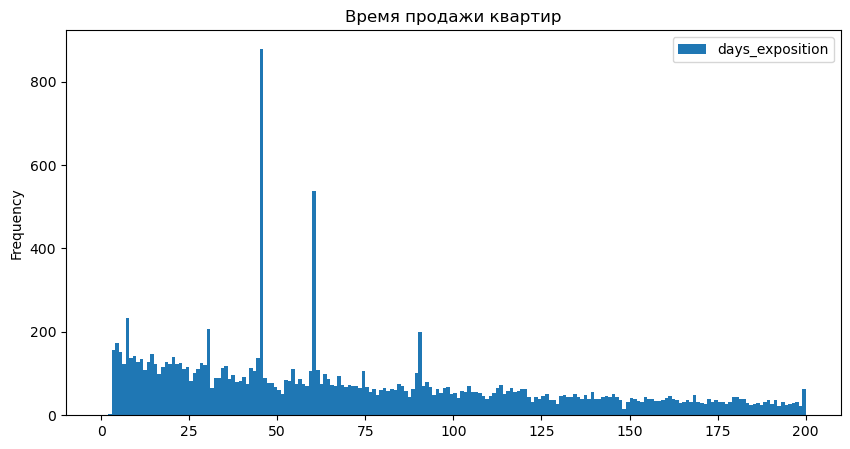

In [58]:
# Построение гистограммы распределения времени продажи по объектам недвижимости
data.plot(kind='hist', y='days_exposition', bins=200, range=(0, 200), title='Время продажи квартир', figsize=(10, 5))

Изучив гистограммы можно сказать, что больше всего квартир реализуется примерно за 45 и за 60 дней.
В соответсвии с описательной статистикой данных :
* быстрые продажи - до 45 дней.
* нормальные время продажи - 45-231 днень.
* долгое время продажи начинается после 232 дня размещенного объявления. 

In [59]:
data['kitchen_area'].head(30)

0     25.00
1     11.00
2      8.30
3       NaN
4     41.00
5      9.10
6     14.40
7     18.90
8      8.81
9      6.50
10     8.50
11     6.00
12     9.00
13     5.20
14     8.00
15     7.60
16     9.00
17    11.00
18     5.60
19    12.00
20    12.00
21     5.70
22    11.00
23     6.10
24    19.60
25    15.00
26     7.00
27     9.20
28    11.70
29    11.00
Name: kitchen_area, dtype: float64

### Удаление аномальных значений

Выведем описательную статистику по всему датасету для определения аномальных значений, выбивающихся из нормального распределения.

In [60]:
# Вывод описательной статистики по датасету
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day,month,year,area_price,floor_class
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,...,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000,23565.000000,23565.000000,23565.000000,2.356500e+04,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,34.454822,5.878124,10.560994,0.593677,...,0.468831,490.580448,0.589900,518.289509,180.741395,2.567367,6.401570,2017.371016,9.940539e+04,2.611797
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,22.045359,4.871485,5.900630,0.960660,...,0.748403,341.572956,0.883966,278.009558,219.732782,1.788279,3.492948,1.037393,5.038944e+04,0.695998
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,0.000000,1.000000,2014.000000,1.110000e+02,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,293.000000,45.000000,1.000000,3.000000,2017.000000,7.656600e+04,2.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,...,0.000000,455.000000,0.000000,503.000000,95.000000,3.000000,6.000000,2017.000000,9.500000e+04,3.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,...,1.000000,612.000000,1.000000,730.000000,231.000000,4.000000,10.000000,2018.000000,1.142130e+05,3.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,6.000000,12.000000,2019.000000,1.907500e+06,3.000000


Построим диаграммы размаха по столбцам last_price, total_area, kitchen_area, living_area, rooms, ceiling_height для визуализации нормального и аномального распределения по данным столбцам.

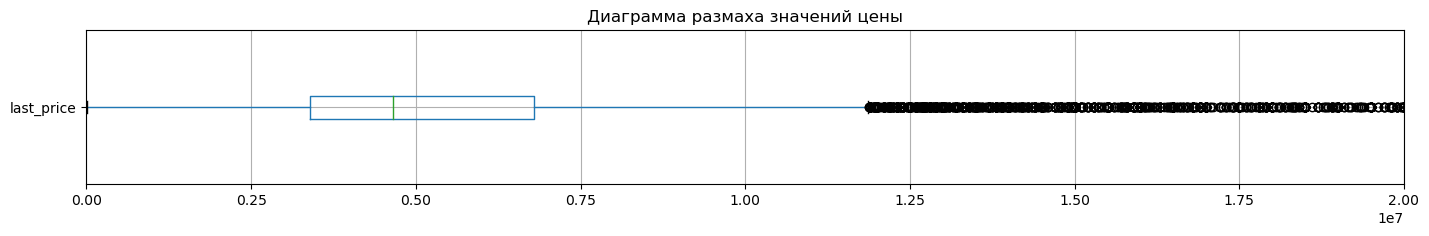

In [61]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['last_price']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений цены')
ax.set_xlim(0, 20000000);

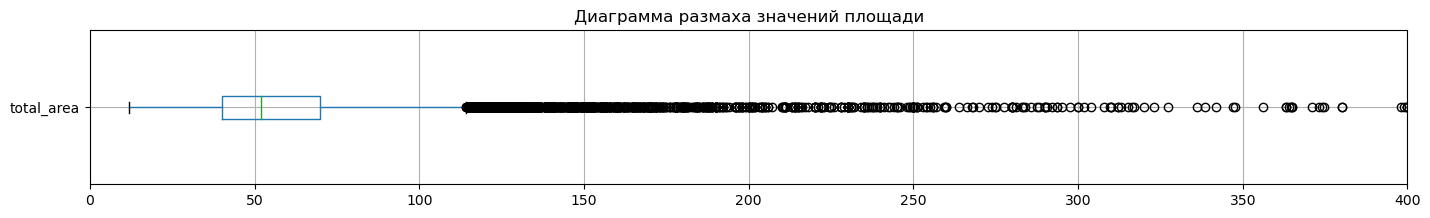

In [62]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

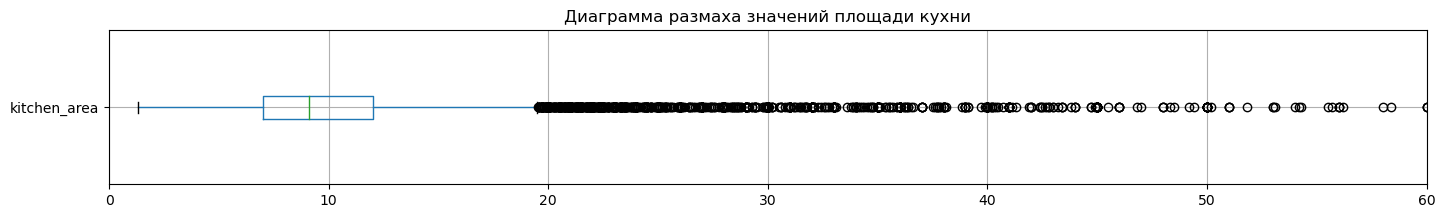

In [63]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['kitchen_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади кухни')
ax.set_xlim(0, 60);

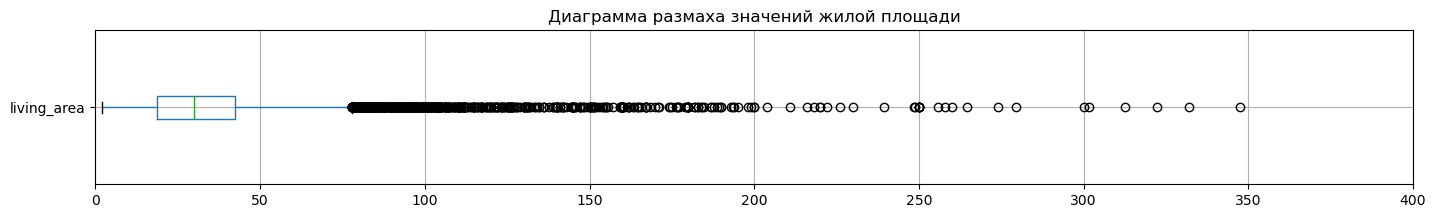

In [64]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['living_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений жилой площади')
ax.set_xlim(0, 400);

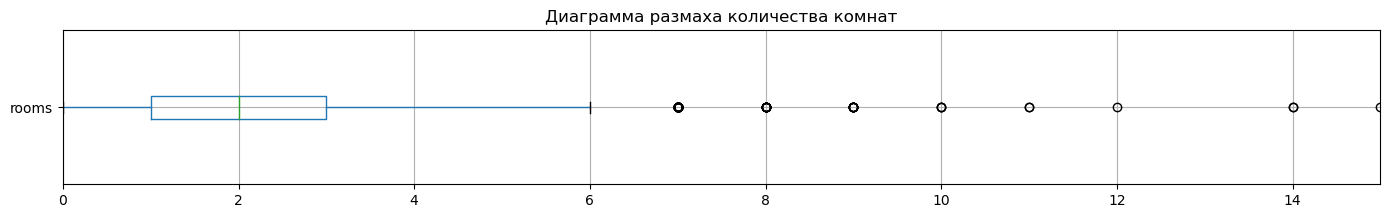

In [65]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['rooms']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха количества комнат')
ax.set_xlim(0, 15);

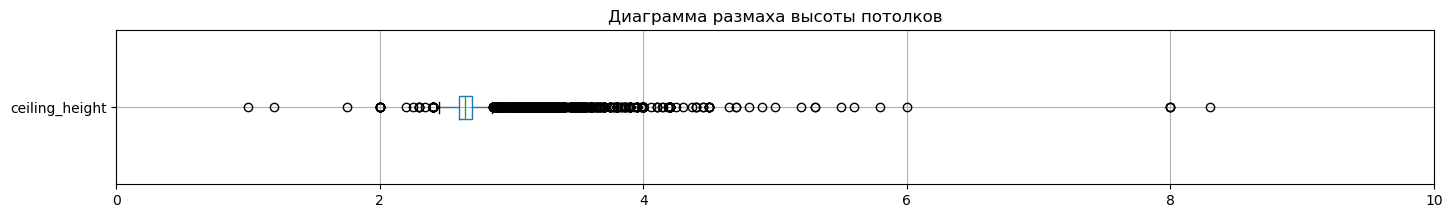

In [66]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['ceiling_height']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха высоты потолков')
ax.set_xlim(0, 10);

На построенных графиках нормального распределения проиллюстрированы аномальные, выбивающиеся значения по каждому столбцу.

Теперь уберем аномальные значения в каждом из них через запросы.

In [67]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day,month,year,area_price,floor_class
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,...,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000,23565.000000,23565.000000,23565.000000,2.356500e+04,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,34.454822,5.878124,10.560994,0.593677,...,0.468831,490.580448,0.589900,518.289509,180.741395,2.567367,6.401570,2017.371016,9.940539e+04,2.611797
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,22.045359,4.871485,5.900630,0.960660,...,0.748403,341.572956,0.883966,278.009558,219.732782,1.788279,3.492948,1.037393,5.038944e+04,0.695998
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,0.000000,1.000000,2014.000000,1.110000e+02,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,293.000000,45.000000,1.000000,3.000000,2017.000000,7.656600e+04,2.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,...,0.000000,455.000000,0.000000,503.000000,95.000000,3.000000,6.000000,2017.000000,9.500000e+04,3.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,...,1.000000,612.000000,1.000000,730.000000,231.000000,4.000000,10.000000,2018.000000,1.142130e+05,3.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,6.000000,12.000000,2019.000000,1.907500e+06,3.000000


In [68]:
data = data.query('last_price.isna() | last_price < 20000000 & last_price > 300000')
data = data.query('total_area.isna() | total_area < 100')
data = data.query('kitchen_area.isna() | kitchen_area < 40')
data = data.query('living_area.isna() | living_area < 200')
data = data.query('rooms.isna() | rooms < 6')
data = data.query('ceiling_height.isna() | ceiling_height < 6 & ceiling_height > 1.9')

для проверки корректности удаления аномальных значений посмотрим на сводную таблицу:

In [69]:
(
    data[['last_price', 'total_area', 'kitchen_area', 'living_area', 'rooms', 'ceiling_height']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,last_price,total_area,kitchen_area,living_area,rooms,ceiling_height
count,"21,548.00","21,548.00","19,510.00","19,880.00","21,548.00","21,548.00"
min,"430,000.00",12.00,1.30,2.00,0.00,2.00
max,"19,999,000.00",99.90,39.70,88.00,5.00,5.80


In [70]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day,month,year,area_price,floor_class
count,21548.000000,2.154800e+04,21548.000000,21548.000000,21548.000000,21548.000000,19880.000000,21548.000000,19510.000000,21548.000000,...,21548.000000,6804.000000,21548.000000,7810.000000,18874.000000,21548.000000,21548.000000,21548.000000,21548.000000,21548.000000
mean,9.746241,4.979347e+06,52.625297,1.904028,2.673226,10.808428,30.076864,5.905374,9.631172,0.596204,...,0.422406,495.205320,0.540421,528.764789,172.098972,2.573232,6.394329,2017.395071,94232.187488,2.605393
std,5.563718,2.583657e+06,17.241223,0.867398,0.182419,6.622828,12.350825,4.894667,3.826825,0.943465,...,0.706311,340.909631,0.841828,277.338766,210.520516,1.793195,3.492511,1.019323,32606.070786,0.704020
min,0.000000,4.300000e+05,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,0.000000,1.000000,2014.000000,7962.000000,1.000000
25%,6.000000,3.300000e+06,39.000000,1.000000,2.600000,5.000000,18.000000,2.000000,7.000000,0.000000,...,0.000000,292.000000,0.000000,310.000000,44.000000,1.000000,3.000000,2017.000000,75257.000000,2.000000
50%,9.000000,4.400000e+06,49.300000,2.000000,2.650000,9.000000,29.000000,4.000000,9.000000,0.000000,...,0.000000,458.000000,0.000000,516.000000,91.000000,3.000000,6.000000,2017.000000,93548.000000,3.000000
75%,14.000000,6.000000e+06,63.500000,3.000000,2.700000,16.000000,39.000000,8.000000,11.000000,1.000000,...,1.000000,618.000000,1.000000,737.000000,217.000000,4.000000,10.000000,2018.000000,111364.250000,3.000000
max,50.000000,1.999900e+07,99.900000,5.000000,5.800000,60.000000,88.000000,31.000000,39.700000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,6.000000,12.000000,2019.000000,392354.000000,3.000000


#### Анализ факторов влияющих на цену недвижимости

Какие факторы больше всего влияют на общую (полную) стоимость объекта?
*  Узнаем, зависит ли цена от:
1. общей площади;
2. жилой площади;
3. площади кухни;
4. количества комнат;
5. этажа, на котором расположена квартира (первый, последний, другой);
6. даты размещения (день недели, месяц, год).

##### Расчет корреляционной зависимости цены от различных параметров

In [71]:
corr_list = ['total_area','living_area','kitchen_area','rooms','floor_class','day','month', 'year']

for entry in corr_list:
    correlation = data['last_price'].corr(data[entry])
    print(f'Корреляция между last_price и {entry} составляет: {correlation:0.1%}')

Корреляция между last_price и total_area составляет: 68.9%
Корреляция между last_price и living_area составляет: 54.2%
Корреляция между last_price и kitchen_area составляет: 51.1%
Корреляция между last_price и rooms составляет: 39.3%
Корреляция между last_price и floor_class составляет: 14.8%
Корреляция между last_price и day составляет: -1.4%
Корреляция между last_price и month составляет: -0.1%
Корреляция между last_price и year составляет: 1.0%


Построим соответствующие графики кореляционной зависимости 

0.6886684527933571

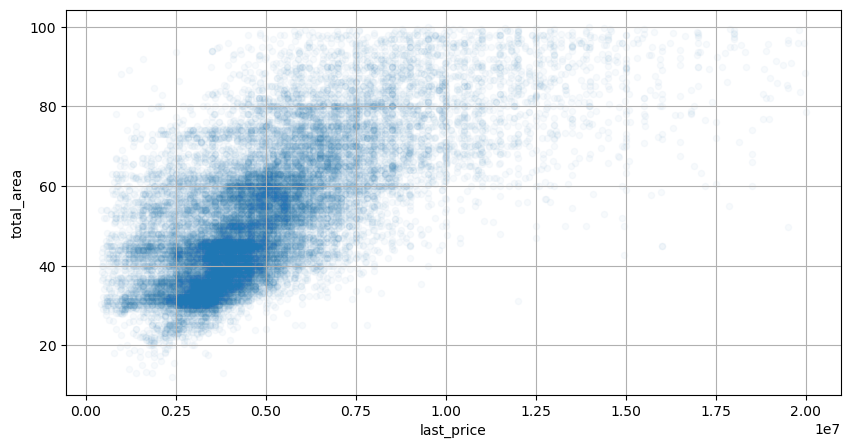

In [72]:
# Построение диаграммы рассеивания по колонке total_area
data.plot(x='last_price', y='total_area', kind='scatter', figsize=(10, 5), alpha=0.03, grid=True)

data['last_price'].corr(data['total_area'])

Из рассчитанного коэффициента кореляции и графика рассеивания видно, что цена и общая площадь объектов недвижимости имеют сильную, положительную взаимосвязь.
Коэффициент Пирсона - 0.68 подтверждает факт взаимосвязи

0.5416698150696174

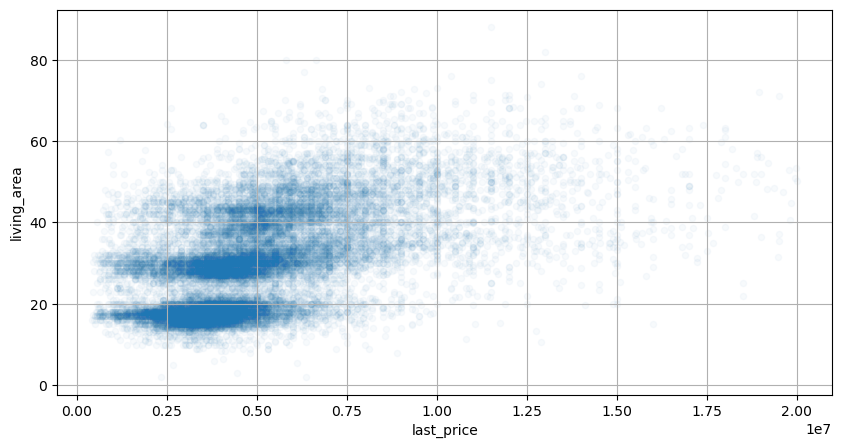

In [73]:
# Построение диаграммы рассеивания по living_area
data.plot(x='last_price', y='living_area', kind='scatter', figsize=(10, 5), alpha=0.03, grid=True)
data['last_price'].corr(data['living_area'])

Из рассчитанного коэффициента кореляции и графика рассеивания видно, что цена и общая  жилая площадь недвижимости имеют, положительную взаимосвязь.
Коэффициент Пирсона - 0.54 подтверждает факт положительной взаимосвязи.

0.5114892684459585

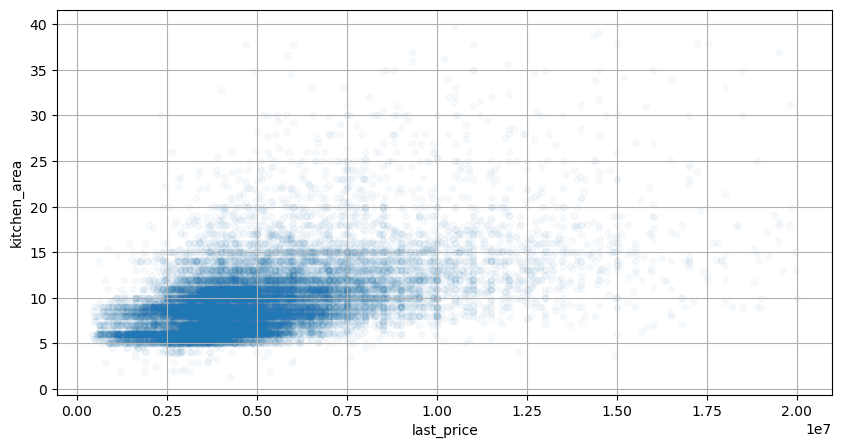

In [74]:
# Построение диаграммы рассеивания по kitchen_area
data.plot(x='last_price', y='kitchen_area', kind='scatter', figsize=(10, 5), alpha=0.03, grid=True)

data['last_price'].corr(data['kitchen_area'])

По рассчитанной диаграмме можно заметить незначительную зависимость цены объекта от площади кухни.
Так коэффициент корреляции Пирсона составляет - 0.51, что говорит о незначительной зависимости.

0.39286369305605884

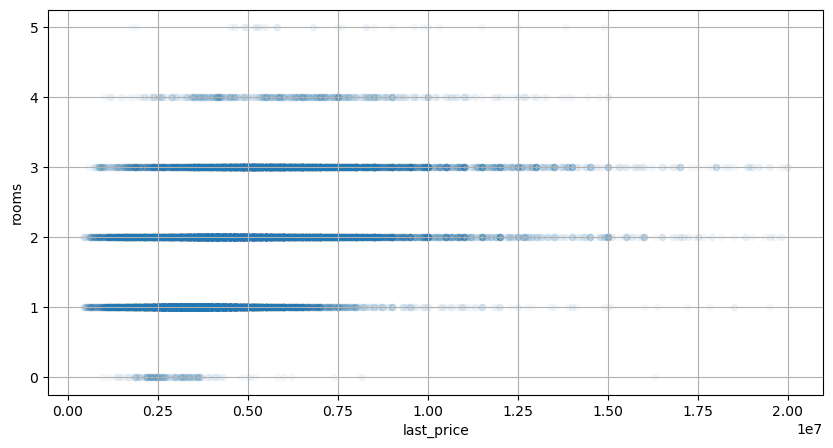

In [75]:
# Построение диаграммы рассеивания по rooms
data.plot(x='last_price', y='rooms', kind='scatter', figsize=(10, 5), alpha=0.03, grid=True)


data['last_price'].corr(data['rooms'])

На диаграмме зависимости цены от количества комнат можно заметить, как отличаются цены взависимости от колличества комнат в квартире.
Коэффициент Пирсона - 0.39, что говорит о слабой зависимости

0.14834777187740747

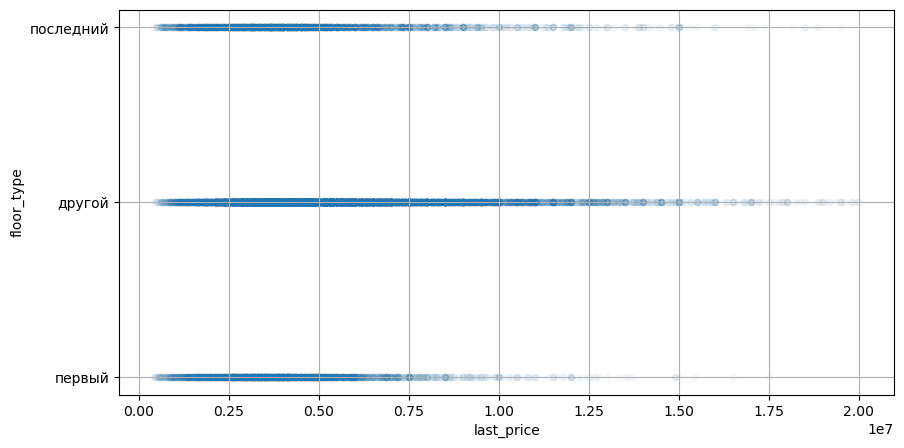

In [76]:
# Построение диаграммы рассеивания по floor_class
data.plot(x='last_price', y='floor_type', kind='scatter', figsize=(10, 5), alpha=0.03, grid=True)

data['last_price'].corr(data['floor_class'])

Из рассчитанного коэффициента кореляции и графика рассеивания видно, что цена и вид этажа квартиры(первый, последний, другой)  имеют слабую корреляцию. Коэффициент Пирсона - 0.14 подтверждает факт слабой взаимосвязи.
Из диаграмы рассеивания можно увидеть, как отличаются по цене квартиры которые расположены ни на первом ни на последнем этажах.

-0.014264271034970912

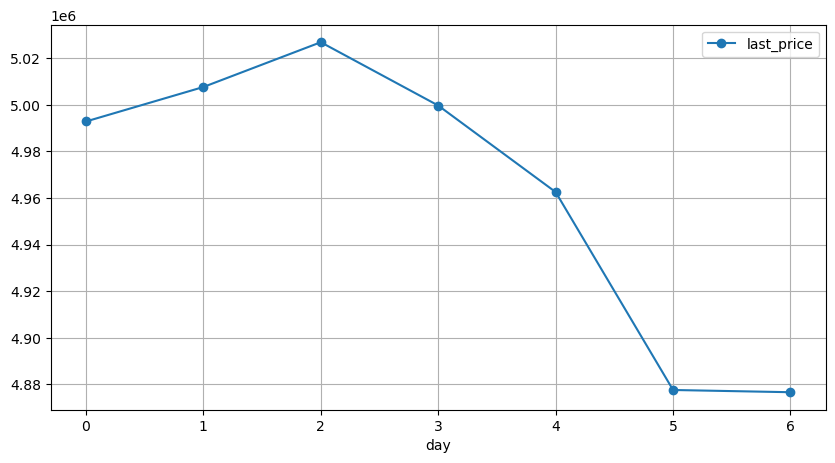

In [77]:
# Построение графика линейного распределения day
(
    data.pivot_table(index='day', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)

data['last_price'].corr(data['day'])

Из построенного графика видно, что средняя стоимость ростет с понедельника по среду. после чего начинается снижение стоимости до субботы. Можно сделать вывод что связано это с большей активностью людей в будние дни. 

-0.0007756089977183356

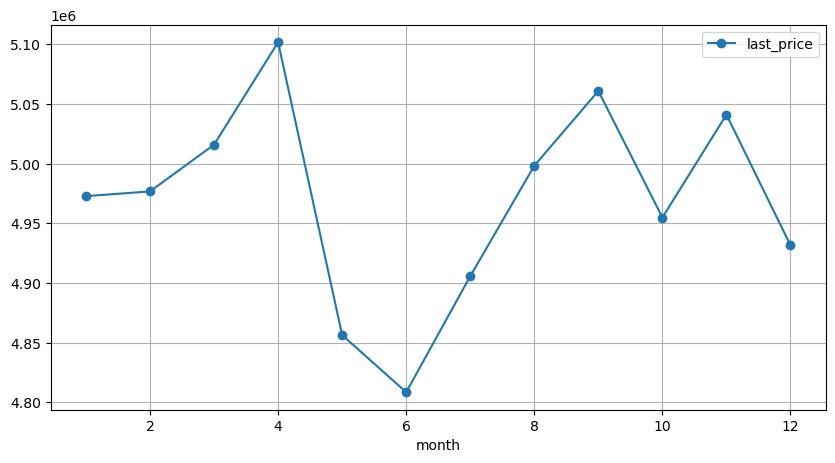

In [78]:
# Построение графика линейного распределения month
(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
data['last_price'].corr(data['month'])

Из рассчитанного коэффициента корреляции и линейного графика видно, что стоимость объектов недвижимости в зависимости от месяца размещения объявления не имеют коррелиционной связи. Однако на линейном графике можно наблюдать пики - минимальная стоимость объектов недвижимости приходится на июнь, а максимальная на апрель.

0.01009244450365093

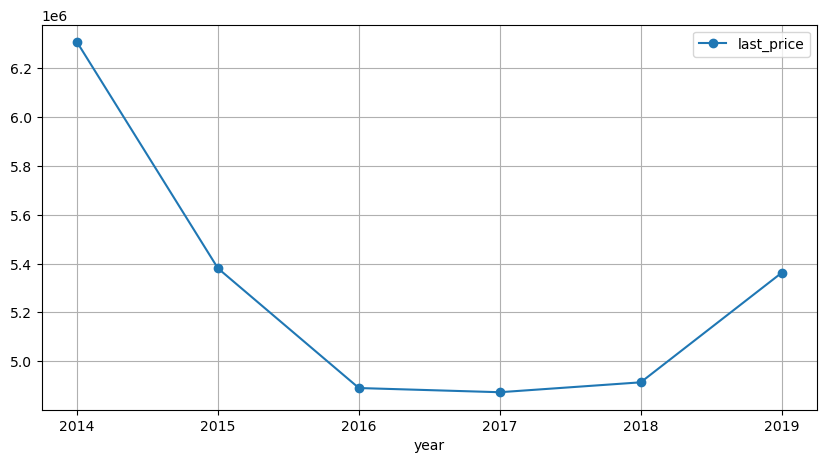

In [79]:
# Построение графика линейного распределения year
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
data['last_price'].corr(data['year'])

Из рассчитанного коэффициента корреляции и линейного графика видно, что стоимость объектов недвижимости в зависимости от года размещения объявления не имеют коррелиционной связи. Однако на линейном графике можно наблюдать с 2014 года тенденцию к уменьшению средней стоимости жилья до 2017 года. в 2018 году наблюдается тренд к росту цены.

### Анализ средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Для начала создадим переменную ten_locations в которой сохраним 10 населенных пунктов с наибольшим количеством объявлений

In [80]:
ten_locations = data['locality_name'].value_counts().head(10)
ten_locations

Санкт-Петербург      13819
поселок Мурино         549
поселок Шушары         429
Всеволожск             390
Пушкин                 337
Колпино                332
поселок Парголово      324
Гатчина                300
деревня Кудрово        297
Выборг                 222
Name: locality_name, dtype: int64

In [81]:
# Вывод отсортированной сводной таблицы по 10 населенным пунктам в соответствии с ценой квадратного метра
ten_locations_sort = (
data.query('locality_name in @ten_locations.index')
.pivot_table(values='area_price', index='locality_name')
.sort_values(by='area_price', ascending=False)
)

ten_locations_sort

,area_price
locality_name,
Санкт-Петербург,108629.941675
Пушкин,101266.359050
деревня Кудрово,92392.454545
поселок Парголово,90494.157407
поселок Мурино,85602.041894
поселок Шушары,78685.787879
Колпино,75321.804217
Гатчина,68950.410000
Всеволожск,67092.994872


<Axes: ylabel='locality_name'>

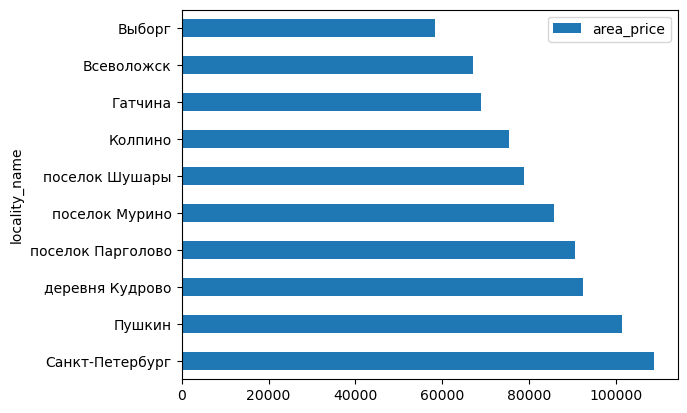

In [82]:
ten_locations_sort.reset_index().plot(kind='barh', x='locality_name',  y='area_price')

Выведем максимальную и минимальную цену за квадратный метр в данных населенных пунктах.

In [83]:
# Вывод максимальной цены за квадратный метр
(
data.query('locality_name in @ten_locations.index')
.pivot_table(values='area_price', index='locality_name')
.sort_values(by='area_price', ascending=False)
.head(1)
)

,area_price
locality_name,
Санкт-Петербург,108629.941675


In [84]:
# Вывод минимальной цены за квадратный метр
(
data.query('locality_name in @ten_locations.index')
.pivot_table(values='area_price', index='locality_name')
.sort_values(by='area_price', ascending=False)
.tail(1)
)

,area_price
locality_name,
Выборг,58261.545045


Из проведенного анализа можно сделать вывод, что наибольшая средняя стоимость квардатного метра жилья приходится на г. Санкт-Петербург. Вторым по стоимости квадратного метра является г. Пушкин. Последним - г. Выборг. Также нужно иметь в виду что самое большое количество объявлений о продаже объектов недвижимости находится в г. Санкт-Петербург (13838 объявлений). В остальных городах кличество объявлений не превышает 551 шт.

### Анализ объектов недвижимости в зависимости от удаленности от центра Санкт-Петербурга

Создадим столбец с удалением от центра в км:

In [85]:
data['city_centers_kilometres'] = (data['city_centers_nearest'] / 1000).fillna(value=0).astype(int)
data['city_centers_kilometres'].head(10)

1     18
2     13
5      0
6     19
7     11
8      0
9     15
10    13
11    51
12     0
Name: city_centers_kilometres, dtype: int32

Построим линейных график зависимости стоимости квартир от их удаленности от центра для возможности произвести визуальный анализ цен.

<Axes: title={'center': 'Распределение стоимости квартир по километрам'}, xlabel='city_centers_kilometres'>

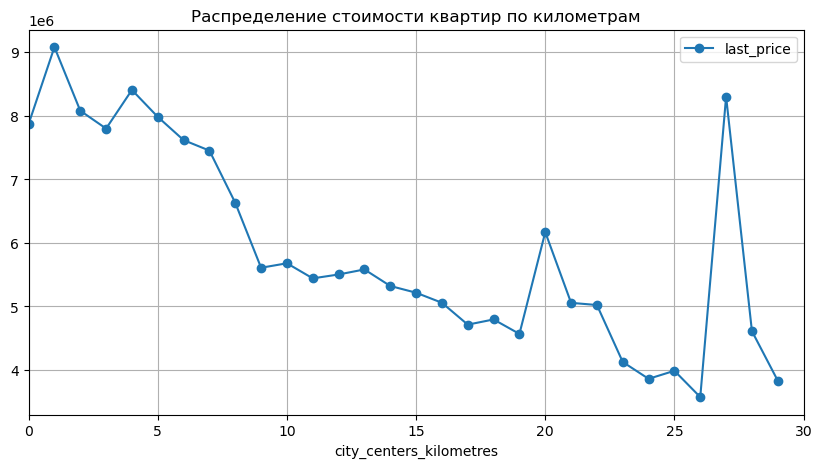

In [86]:
# Вывод линейного графика зависимости стоимости объектов недвижимости от их удаленности от центра
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_kilometres', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,30), figsize=(10, 5), title='Распределение стоимости квартир по километрам')
)

Исходя из графика можно сделать вывод, что наибольшая стоимость объектов недвижимости находится ближе всего к центру города. На отметке 7 километров от центра Санкт-Петербурга, стоимость объктов недвижимости начинает резко падать. 
На расстоянии 20 и 27 км от центра наблюдается всплеск цены, скорее всего это связано с отдельными дорогими районами. 

### Общий вывод

В данной исследовательской работе мы изучили объявления о продаже квартир. Мы проанализировали зависимость цены квартир от различных показателей, таких как общая площадь, жилая площадь, площадь кухни, этажа на котором расположена квартира, а так же выявили их корреляционную составляющую.

Но прежде чем преступить к исследовательской части, мы провели исследование самого датафрейма и выявили ряд недочетов которые мы исправили,путем удаления всех неявных дубликатов в названиях населенных пунктов. Исправлены опечатки и удалены аномальные значения в данных.

Из проведенного анализа можно сделать следующие выводы:

нормальное распределение площади квартир в выборке от 40 до 70 квадратных метров;
нормальное распределение жилой площади квартир от 18 до 42 квадратных метров;
нормальное распределение площади кухни от 7 до 12 квадртатных метров
нормальное распределение стоимости квартир находится в диапазоне от 3 470 000 руб. до 6 790 000 руб.;
нормальное распределение комнатности квартир составляет от 1 до 3 комнат.
нормальное распределение высоты потолков лежит в диапозоне от 2.6 метров до 2.7 метров
нормальное распределение общего количества этажей в доме от 5 до 16. Из данных заметно что преимущественная застройка в Санкт-Петербурге 5,9,16,25 этажные дома.
нормальное расспределение количества дней продажи квартир составляет от 45 до 231 дней.

Из корреляционных расчетов видно, что:

стоимость объектов недвижимости и общая площадь объектов имеют сильную, положительную корреляционную связь;
стоимость объектов недвижимости и их жилая площадь имеют среднюю положительную корреляционную связь;
стоимость объектов недвижимости и площадь кухни имеют среднюю положительную корреляционную связь;
стоимость объектов недвижимости и комнатность имеют среднюю положительную корреляционную связь;
стоимость объектов недвижимости и их этажности не имеют слабую коррелиционную связь;
стоимость объектов недвижимости в зависимости от дня\месяца\года размещения объявления не имеют коррелиционной связи;

Исходя из количества объявлений о продаже квартир, можно уверено сказать что г. Санкт-Петербург является центром своего региона. В Санкт петербурге чаще всего встречаются 5 и 9 этажные жилые дома, большая часть квартир находится на расстоянии 13000 - 16000 тысяч метров от центра. 
В целом подводя итоги, можно сделать вывод что Санкт-Петербург  является типичным Российским городом в в котором есть "богатые" и "не очень" районы, со своими особенностями в плане застройки, парками и аэропортами. В котором стоимость квартир в первую очередь зависит от общей площади недвижимости и от расстояния до центра города или привлекательного района.
